### Using restricted Boltzmann machine for anomaly detection with a large number of variables

In [4]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from rbm import RBM

In [51]:
# Put the data here 
df_numeric_array = pd.read_csv("df_numeric.csv")
df_anomaly_array = pd.read_csv("df_anomaly.csv")

In [52]:
df_anomaly_array = np.array(df_anomaly_array)

In [53]:
# Remove invariant array
list_invariant_array = []
for c in range(df_anomaly_array.shape[1]):
    if df_anomaly_array[:,c].std()==0:
        list_invariant_array.append(c)
df_anomaly_array = np.delete(df_anomaly_array, list_invariant_array, 1)

In [54]:
# Normalize data by removing mean and dividing by standard deviation
cols_mean = []
cols_std = []
for c in range(df_anomaly_array.shape[1]):
    cols_mean.append(df_anomaly_array[:,c].mean())
    cols_std.append(df_anomaly_array[:,c].std())
    df_anomaly_array[:, c] = (df_anomaly_array[:, c] - cols_mean[-1]) / cols_std[-1]

In [55]:
RBM_model = RBM(num_visible=df_anomaly_array.shape[1], 
                num_hidden=15, 
                visible_unit_type='gauss', 
                main_dir='/Users/az02234/Documents/Projet_AC/Data_SMACC', 
                model_name='rbm_model.ckpt',
                gibbs_sampling_steps=4, 
                learning_rate=0.0001, 
                momentum=0.95, 
                batch_size=512, 
                num_epochs=100, 
                verbose=1)

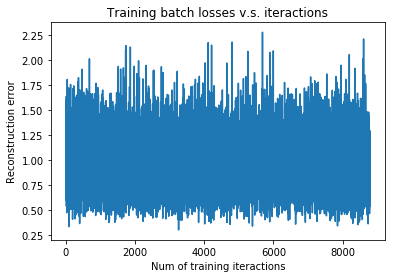

In [57]:
RBM_model.fit(train_set=df_anomaly_array, validation_set=None, restore_previous_model=False)

In [67]:
# Anomaly index is based on the "free energy" for a single observation, i.e. the likelihood of an observation
# given the estimated parameters and the hidden variables 
anomalies_df = pd.DataFrame(RBM_model.getFreeEnergy(df_anomaly_array), columns=["free_energy"])

INFO:tensorflow:Restoring parameters from /Users/az02234/Documents/Projet_AC/Data_SMACC/rbm_model.ckpt


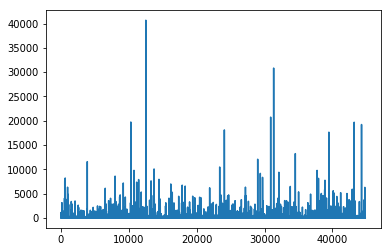

In [68]:
anomalies_df.free_energy.plot()

In [ ]:
# classify anomaly
anomaly_rate = 0.05
anomalies_df = anomalies_df.sort_values(by="free_energy")
anomalies_df["anomaly_rbm"] = 0
anomalies_df.iloc[round(anomalies_df.shape[0]*(1-anomaly_rate)):, 1]=1

In [72]:
print(anomalies_df.free_energy.quantile(0.95))
print(anomalies_df.free_energy.quantile(0.99))
print(anomalies_df.describe())

8.252873420715217
660.3126318359339
        free_energy   anomaly_rbm
count  4.484200e+04  44842.000000
mean           -inf      0.049998
std             NaN      0.217943
min            -inf      0.000000
25%   -1.018462e+01      0.000000
50%   -1.014888e+01      0.000000
75%   -1.008132e+01      0.000000
max    4.068868e+04      1.000000
